In [1]:
!pip install citipy

In [2]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

# Import API key
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#Only Set to 15
lats = np.random.uniform(low=-90.000, high=90.000, size=15)
lngs = np.random.uniform(low=-180.000, high=180.000, size=15)
#Only Set to 15
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['vaini', 'nikolskoye', 'port alfred', 'nouadhibou', 'chengde', 'port hedland', 'lebu', 'saldanha', 'dingle', 'byron bay', 'yerbogachen', 'georgetown', 'cherskiy', 'bengkulu', 'cap malheureux']


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities
#Plots are listed in Imperial
units = "imperial"
#Manual API option
api_key = "ab6b6f7264d209fd092074fa3b76ef60"

In [5]:
# Test for city of London to see if URL and API work
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url_test = f"{base_url}appid={api_key}&units={units}&q=muros"
response=requests.get(query_url_test).json()
response

{'coord': {'lon': -9.06, 'lat': 42.77},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 67.8,
  'pressure': 1020,
  'humidity': 72,
  'temp_min': 64.99,
  'temp_max': 71.01},
 'visibility': 10000,
 'wind': {'speed': 11.41, 'deg': 350},
 'clouds': {'all': 20},
 'dt': 1563647280,
 'sys': {'type': 1,
  'id': 6434,
  'message': 0.0065,
  'country': 'ES',
  'sunrise': 1563599719,
  'sunset': 1563653367},
 'timezone': 7200,
 'id': 3115824,
 'name': 'Muros',
 'cod': 200}

In [6]:
# Create empty lists to append the API data into lists 
city_name = []
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 0
set= 1
count= 0

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    
    #used to count to 50 and reset
    if count == 50:
        #sets a sleep period for api
       time.sleep(1)
       count = 0
       record = 0
       set+=1
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{base_url}appid={api_key}&units={units}&q={city}").json()
        city_name.append(response["name"])
        city_id.append(response["id"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
                
        # Increase counter by one 
        count += 1
        record += 1
        
        #Print log of each city as it's being processed with the city name.
        print(f"Processing Record {record} of Set {set} | {city}")
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
# Log file print statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | nouadhibou
Processing Record 5 of Set 1 | chengde
Processing Record 6 of Set 1 | port hedland
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | byron bay
Processing Record 11 of Set 1 | yerbogachen
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | cherskiy
City not found. Skipping...
Processing Record 14 of Set 1 | cap malheureux
-------------------------------
Data Retrieval Complete
-------------------------------


In [7]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    #Unsure if a City ID needs to be displayed, requested in instructions but the example does not show a ID
    #"City ID": city_id,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          14
Cloudiness    14
Country       14
Date          14
Humidity      14
Lat           14
Lng           14
Max Temp      14
Wind Speed    14
dtype: int64

In [8]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,96,IN,1563647686,92,15.34,74.49,77.38,5.06
1,Nikolskoye,20,RU,1563647686,68,59.70,30.79,68.00,4.47
2,Port Alfred,93,ZA,1563647389,72,-33.59,26.89,55.00,5.01
3,Nouadhibou,0,MR,1563647686,61,20.93,-17.03,77.00,16.11
4,ChengDe,33,CN,1563647686,95,40.97,117.93,66.40,2.28


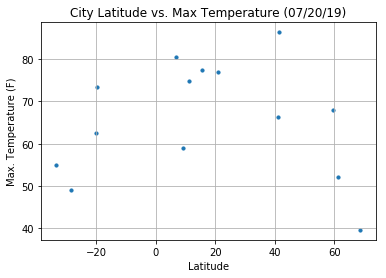

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

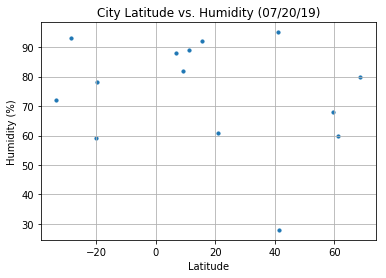

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

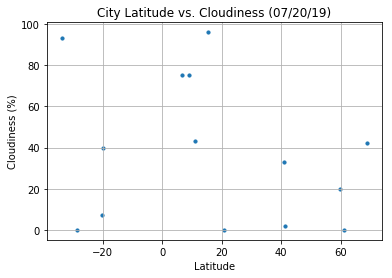

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

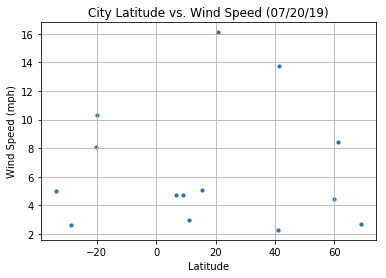

In [14]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()


In [ ]:
#Three Observable Trends
#Overall the vast majority of Cities in any latitude have wind speeds below 10 miles per hour.
#Cities near the equator have higher humidity than furth away from the equator. However humidity is fairly high in both hemispheres and appear to mirror each other.
#Temperature graph has the most observable trends with the Equator and Tropics beign the warmest. The Northern Hemisphere is warm during summertime and Southern Hemisphere is cooler due to its winter season.